In [8]:
import pandas as pd

files_dir = "/home/rudi/Projects/profile-based-anomaly-detection/data/dotlist_induced3"
annotations = pd.read_csv(f"{files_dir}/annotations.csv")

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(input='filename', token_pattern=r"\b[a-zA-Z_0-9=][a-zA-Z_0-9=]+\b")
file_names = annotations['MESSAGE'].to_list()
file_paths = list(map(lambda x: f"{files_dir}/documents/{x}", file_names))
matrix = vectorizer.fit_transform(file_paths)

In [10]:
tokens = vectorizer.get_feature_names_out()
vector_df = pd.DataFrame(data = matrix.toarray(), index=file_names, columns = tokens)

In [11]:
vector_df['score'] = vector_df.sum(axis=1)

In [12]:
averaged_scores = vector_df.apply(lambda x: x['score'] / len(open(f"{files_dir}/documents/{x.name}", "r").read().split(" ")), axis=1)
averaged_scores.describe()

count    4979.000000
mean        0.222254
std         0.153747
min         0.057596
25%         0.118227
50%         0.176175
75%         0.265363
max         1.407358
dtype: float64

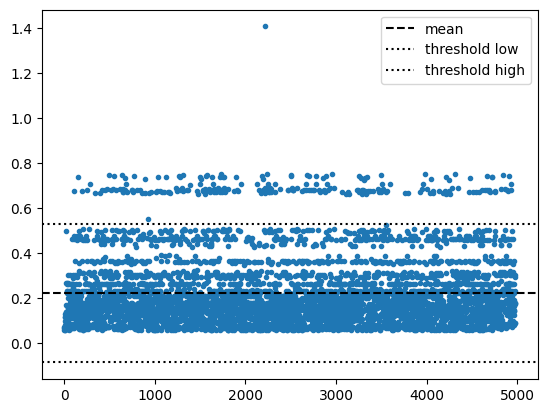

In [13]:
from matplotlib import pyplot as plt

mean = averaged_scores.mean()
std = averaged_scores.std()

th_low = (mean - (2 * std))
th_high = (mean + (2 * std))

plt.scatter(x=range(len(averaged_scores)), y=averaged_scores.to_list(), marker='.')
plt.axhline(y=mean, color='k', linestyle='--', label='mean')
plt.axhline(y=th_low, color='k', linestyle=':', label='threshold low')
plt.axhline(y=th_high, color='k', linestyle=':', label='threshold high')
plt.legend()
plt.show()

In [14]:

y_true = annotations['CODE'] > 0
y_pred = ((averaged_scores > th_high) | (averaged_scores < th_low))

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.95      0.97      4949
        True       0.01      0.10      0.02        30

    accuracy                           0.95      4979
   macro avg       0.50      0.53      0.50      4979
weighted avg       0.99      0.95      0.97      4979

[[4718  231]
 [  27    3]]
